In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла Excel
url = 'https://docs.google.com/spreadsheets/d/1y9ekfl_0NOFLQtwqzXcJdijcMqquSDUn_XqtW-S7R3Q/export?format=xlsx'

# Чтение листов в два отдельных DataFrame
reservoir_df = pd.read_excel(url, sheet_name='Reservoir', index_col=False)
wells_df = pd.read_excel(url, sheet_name='Wells', index_col=False, names=['date',	'field_id',	'well_id', 'oil',	'gas',	'water'])

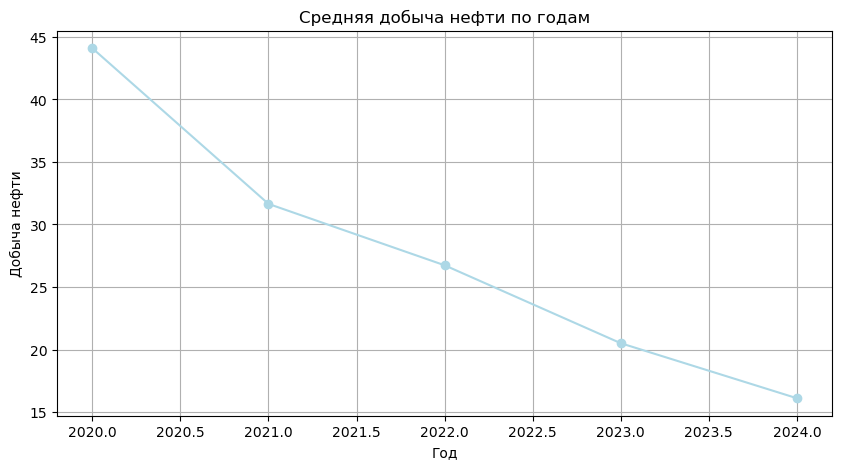

In [2]:
# №1

def plot_oil_by_field_and_well(field_id_value, well_id_value):
    wells_df['date'] = pd.to_datetime(wells_df['date'], errors='coerce')
    wells_df.dropna(subset=['date'], inplace=True)
    wells_df['year'] = wells_df['date'].dt.year

    filtered = wells_df[
        (wells_df['field_id'] == field_id_value) &  
        (wells_df['well_id'] == well_id_value)      
    ]

    if filtered.empty:
        print("Нет данных по заданному field_id и well_id.")
        return
    
    yearly_oil = filtered.groupby('year')['oil'].sum()
    
    plt.figure(figsize=(10, 5))
    plt.plot(
        yearly_oil.index,          
        yearly_oil.values,         
        marker='o',                 
        linestyle='-',              
        color='lightblue'               
    )
    
    plt.title(f"Средняя добыча нефти по годам") 
    plt.xlabel("Год")                          
    plt.ylabel("Добыча нефти")                   
    plt.grid(True)                              
    plt.show()                                  

plot_oil_by_field_and_well("Старое", "3а")

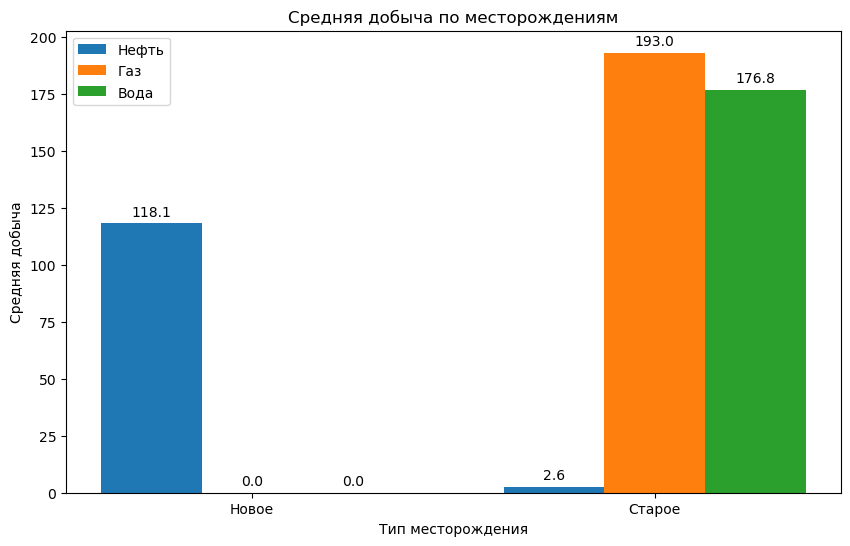

In [4]:
# №2

def plot_avg_production_by_field_type():
    
    labels_map = {0: 'Новое', 1: 'Старое'}
    grouped = wells_df.groupby('field_id')[['oil', 'gas', 'water']].mean()

    labels = [labels_map.get(i, str(i)) for i in grouped.index]
    
    oil = grouped['oil'].tolist()      
    gas = grouped['gas'].tolist()     
    water = grouped['water'].tolist() 
    
    x = range(len(labels))     
    width = 0.25               
   
    fig, ax = plt.subplots(figsize=(10, 6))
   
    bars1 = ax.bar([i - width for i in x], oil, width, label='Нефть')
    bars2 = ax.bar(x, gas, width, label='Газ')
    bars3 = ax.bar([i + width for i in x], water, width, label='Вода')
    
    for bars in (bars1, bars2, bars3):
        for bar in bars:
            height = bar.get_height()   
            ax.annotate(f'{height:.1f}', 
                        xy=(bar.get_x() + bar.get_width() / 2, height),  
                        xytext=(0, 3),           
                        textcoords="offset points",
                        ha='center', va='bottom')  
   
    ax.set_xlabel('Тип месторождения')
    ax.set_ylabel('Средняя добыча')
    ax.set_title('Средняя добыча по месторождениям')
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    
    ax.legend()
   
    plt.show()

plot_avg_production_by_field_type()

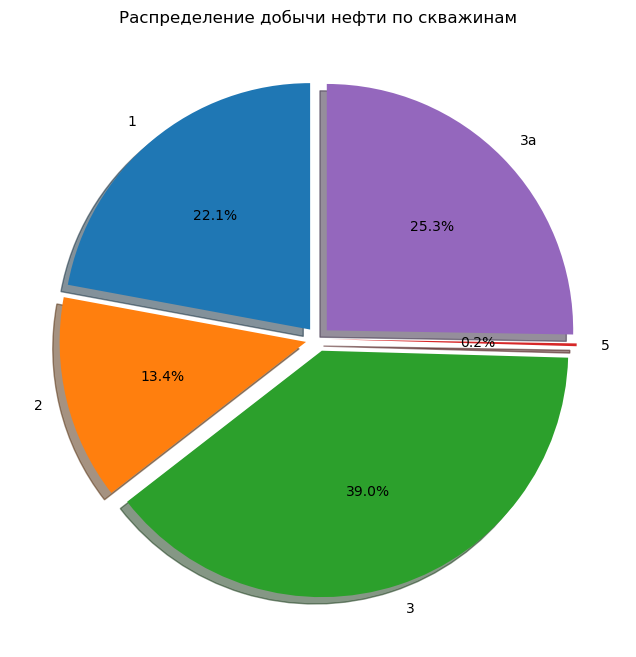

In [ ]:
# №3

def plot_oil_distribution_by_wells():
   
    oil_by_well = wells_df.groupby('well_id')['oil'].sum()
    labels = oil_by_well.index.astype(str)
    values = oil_by_well.values
    
    explode = [0.05] * len(values)
  
    plt.figure(figsize=(8, 8))
    
    plt.pie(values,
            labels=labels,            
            explode=explode,          
            autopct='%1.1f%%',        
            shadow=True,              
            startangle=90)            
    
    plt.title('Распределение добычи нефти по скважинам')
    plt.show()

plot_oil_distribution_by_wells()

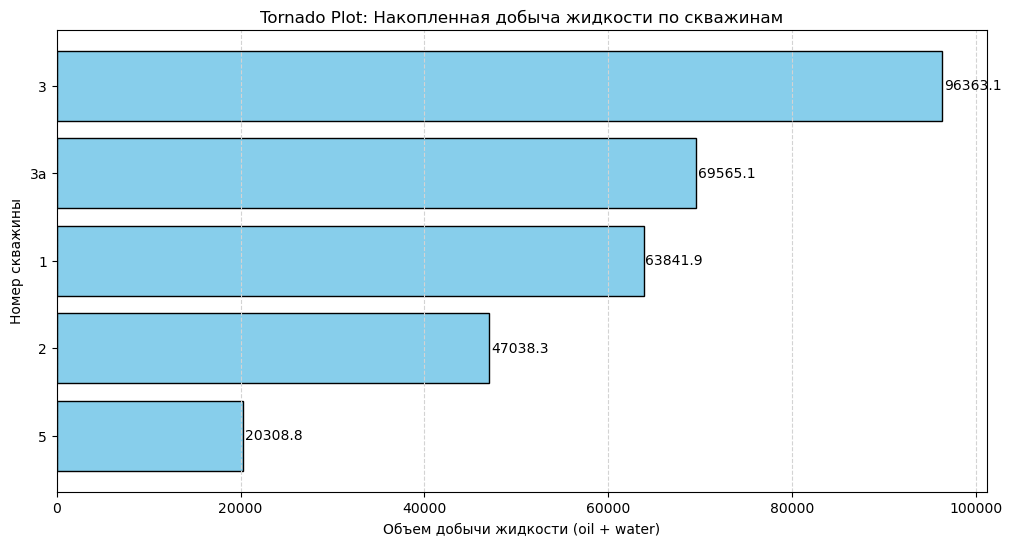

In [ ]:
# №4

wells_df['oil'] = pd.to_numeric(wells_df['oil'], errors='coerce').fillna(0)
wells_df['water'] = pd.to_numeric(wells_df['water'], errors='coerce').fillna(0)

wells_df['liquid'] = wells_df['oil'] + wells_df['water']

liquid_by_well = wells_df.groupby('well_id')['liquid'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.barh(y=liquid_by_well.index.astype(str),  
                width=liquid_by_well.values,
                color='skyblue', edgecolor='black')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 200, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', va='center')


plt.xlabel('Объем добычи жидкости (oil + water)')
plt.ylabel('Номер скважины')
plt.title('Tornado Plot: Накопленная добыча жидкости по скважинам')
plt.gca().invert_yaxis() 
plt.grid(axis='x', color='lightgray', linestyle='--', linewidth=0.8) 
plt.show()

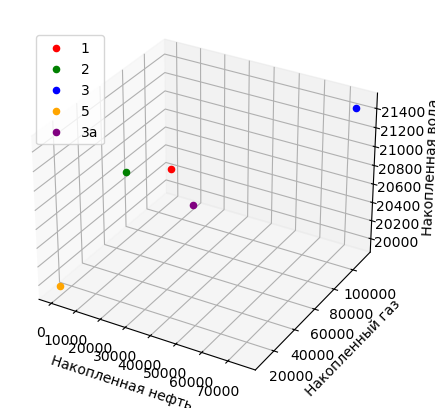

In [7]:
# №5

for col in ['oil', 'gas', 'water']:
    wells_df[col] = pd.to_numeric(wells_df[col], errors='coerce').fillna(0)


plot_data = wells_df.groupby('well_id')[['oil', 'gas', 'water']].sum().reset_index()


basic_colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'gray']

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

for i in range(len(plot_data)):
    color = basic_colors[i % len(basic_colors)]  
    oil = plot_data.loc[i, 'oil']
    gas = plot_data.loc[i, 'gas']
    water = plot_data.loc[i, 'water']
    label = str(plot_data.loc[i, 'well_id'])
    ax.scatter(oil, gas, water, color=color, s=20, label=label)


ax.set_xlabel('Накопленная нефть')
ax.set_ylabel('Накопленный газ')
ax.set_zlabel('Накопленная вода')


ax.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))

plt.show()